In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, 
                             recall_score, f1_score, matthews_corrcoef, 
                             classification_report)
from sklearn.preprocessing import StandardScaler

print("Loading dataset...")

Loading dataset...


In [9]:
data=pd.read_csv('earthquake_data_tsunami.csv')

dataset_name = "Earthquake Tsunami Prediction"  
dataset_source = "Kaggle/Public Dataset" 
n_samples = 782   
n_features = 12  
problem_type = "binary_classification"


In [10]:
X = data.drop('tsunami', axis=1)
y = data['tsunami'].values

print(f"Missing values:\n{X.isnull().sum()}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fill these after preprocessing
train_samples = X_train_scaled.shape[0]    
test_samples = X_test_scaled.shape[0]     
train_test_ratio = 0.8 


Missing values:
magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
dtype: int64


## Helper Functions

In [11]:
def calculate_metrics(y_true, y_pred, y_pred_proba, model_name):
    """
    Calculate all required evaluation metrics for a classification model
    
    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - y_pred_proba: Predicted probabilities for positive class
    - model_name: Name of the model
    
    Returns:
    - Dictionary containing all metrics
    """
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'AUC Score': roc_auc_score(y_true, y_pred_proba),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'MCC Score': matthews_corrcoef(y_true, y_pred)
    }
    return metrics

## Model 1: Logistic Regression

In [12]:
def train_logistic_regression(X_train, X_test, y_train, y_test):
    """
    Train and evaluate Logistic Regression model
    
    Returns:
    - Dictionary containing all evaluation metrics
    """
    print("Training Logistic Regression...")
    
    # Initialize and train model
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = lr_model.predict(X_test)
    y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = calculate_metrics(y_test, y_pred, y_pred_proba, 'Logistic Regression')
    
    print(f"Accuracy: {metrics['Accuracy']:.4f}, AUC: {metrics['AUC Score']:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    
    return metrics

# Train and evaluate
lr_metrics = train_logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

Training Logistic Regression...
Accuracy: 0.8471, AUC: 0.8929

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        91
           1       0.78      0.88      0.83        66

    accuracy                           0.85       157
   macro avg       0.84      0.85      0.85       157
weighted avg       0.85      0.85      0.85       157



## Model 2: Decision Tree Classifier

In [13]:
def train_decision_tree(X_train, X_test, y_train, y_test):
    """
    Train and evaluate Decision Tree Classifier
    
    Returns:
    - Dictionary containing all evaluation metrics
    """
    print("Training Decision Tree Classifier...")
    
    # Initialize and train model
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = dt_model.predict(X_test)
    y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = calculate_metrics(y_test, y_pred, y_pred_proba, 'Decision Tree')
    
    print(f"Accuracy: {metrics['Accuracy']:.4f}, AUC: {metrics['AUC Score']:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    
    return metrics

# Train and evaluate
dt_metrics = train_decision_tree(X_train_scaled, X_test_scaled, y_train, y_test)

Training Decision Tree Classifier...
Accuracy: 0.9172, AUC: 0.9098

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        91
           1       0.93      0.86      0.90        66

    accuracy                           0.92       157
   macro avg       0.92      0.91      0.91       157
weighted avg       0.92      0.92      0.92       157



## Model 3: K-Nearest Neighbor Classifier

In [14]:
def train_knn(X_train, X_test, y_train, y_test):
    """
    Train and evaluate K-Nearest Neighbor Classifier
    
    Returns:
    - Dictionary containing all evaluation metrics
    """
    print("Training K-Nearest Neighbor Classifier...")
    
    # Initialize and train model
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn_model.predict(X_test)
    y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = calculate_metrics(y_test, y_pred, y_pred_proba, 'K-Nearest Neighbor')
    
    print(f"Accuracy: {metrics['Accuracy']:.4f}, AUC: {metrics['AUC Score']:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    
    return metrics

# Train and evaluate
knn_metrics = train_knn(X_train_scaled, X_test_scaled, y_train, y_test)

Training K-Nearest Neighbor Classifier...
Accuracy: 0.8599, AUC: 0.8954

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.87        91
           1       0.80      0.89      0.84        66

    accuracy                           0.86       157
   macro avg       0.86      0.86      0.86       157
weighted avg       0.87      0.86      0.86       157



## Model 4: Naive Bayes Classifier (Gaussian)

In [15]:
def train_naive_bayes(X_train, X_test, y_train, y_test):
    """
    Train and evaluate Gaussian Naive Bayes Classifier
    
    Returns:
    - Dictionary containing all evaluation metrics
    """
    print("Training Gaussian Naive Bayes Classifier...")
    
    # Initialize and train model
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = nb_model.predict(X_test)
    y_pred_proba = nb_model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = calculate_metrics(y_test, y_pred, y_pred_proba, 'Gaussian Naive Bayes')
    
    print(f"Accuracy: {metrics['Accuracy']:.4f}, AUC: {metrics['AUC Score']:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    
    return metrics

# Train and evaluate
nb_metrics = train_naive_bayes(X_train_scaled, X_test_scaled, y_train, y_test)

Training Gaussian Naive Bayes Classifier...
Accuracy: 0.8280, AUC: 0.8473

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        91
           1       0.73      0.92      0.82        66

    accuracy                           0.83       157
   macro avg       0.83      0.84      0.83       157
weighted avg       0.85      0.83      0.83       157



## Model 5: Ensemble Model - Random Forest

In [16]:
def train_random_forest(X_train, X_test, y_train, y_test):
    """
    Train and evaluate Random Forest Classifier
    
    Returns:
    - Dictionary containing all evaluation metrics
    """
    print("Training Random Forest Classifier...")
    
    # Initialize and train model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = calculate_metrics(y_test, y_pred, y_pred_proba, 'Random Forest')
    
    print(f"Accuracy: {metrics['Accuracy']:.4f}, AUC: {metrics['AUC Score']:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    
    return metrics

# Train and evaluate
rf_metrics = train_random_forest(X_train_scaled, X_test_scaled, y_train, y_test)

Training Random Forest Classifier...
Accuracy: 0.9299, AUC: 0.9819

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        91
           1       0.88      0.97      0.92        66

    accuracy                           0.93       157
   macro avg       0.93      0.94      0.93       157
weighted avg       0.93      0.93      0.93       157



## Model 6: Ensemble Model - XGBoost

In [17]:
def train_xgboost(X_train, X_test, y_train, y_test):
    """
    Train and evaluate XGBoost Classifier
    
    Returns:
    - Dictionary containing all evaluation metrics
    """
    print("Training XGBoost Classifier...")
    
    # Initialize and train model
    xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = xgb_model.predict(X_test)
    y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = calculate_metrics(y_test, y_pred, y_pred_proba, 'XGBoost')
    
    print(f"Accuracy: {metrics['Accuracy']:.4f}, AUC: {metrics['AUC Score']:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    
    return metrics

# Train and evaluate
xgb_metrics = train_xgboost(X_train_scaled, X_test_scaled, y_train, y_test)

Training XGBoost Classifier...
Accuracy: 0.9236, AUC: 0.9794

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        91
           1       0.88      0.95      0.91        66

    accuracy                           0.92       157
   macro avg       0.92      0.93      0.92       157
weighted avg       0.93      0.92      0.92       157



## Model Comparison Summary

In [18]:
# Compile all results
all_results = [lr_metrics, dt_metrics, knn_metrics, nb_metrics, rf_metrics, xgb_metrics]

# Create comparison DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(4)

# Display results
print("\n" + "="*90)
print("MODEL PERFORMANCE COMPARISON")
print("="*90)
print(results_df.to_string(index=False))
print("="*90)

# Find best model for each metric
print("\n" + "="*90)
print("BEST MODEL BY METRIC")
print("="*90)
for metric in ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score', 'MCC Score']:
    best_idx = results_df[metric].idxmax()
    best_model = results_df.loc[best_idx, 'Model']
    best_score = results_df.loc[best_idx, metric]
    print(f"{metric:20s}: {best_model:25s} ({best_score:.4f})")
print("="*90)


MODEL PERFORMANCE COMPARISON
               Model  Accuracy  AUC Score  Precision  Recall  F1 Score  MCC Score
 Logistic Regression    0.8471     0.8929     0.7838  0.8788    0.8286     0.6951
       Decision Tree    0.9172     0.9098     0.9344  0.8636    0.8976     0.8301
  K-Nearest Neighbor    0.8599     0.8954     0.7973  0.8939    0.8429     0.7210
Gaussian Naive Bayes    0.8280     0.8473     0.7349  0.9242    0.8188     0.6749
       Random Forest    0.9299     0.9819     0.8767  0.9697    0.9209     0.8618
             XGBoost    0.9236     0.9794     0.8750  0.9545    0.9130     0.8476

BEST MODEL BY METRIC
Accuracy            : Random Forest             (0.9299)
AUC Score           : Random Forest             (0.9819)
Precision           : Decision Tree             (0.9344)
Recall              : Random Forest             (0.9697)
F1 Score            : Random Forest             (0.9209)
MCC Score           : Random Forest             (0.8618)


## Model Performance Observations

Below are the observations about each model's performance on the Earthquake Tsunami Prediction dataset:

| ML Model Name | Observation about Model Performance |
|---------------|-------------------------------------|
| **Logistic Regression** | Linear model that performs well for linearly separable data. Shows good baseline performance with fast training time. May struggle with complex non-linear relationships in earthquake-tsunami patterns. Provides interpretable coefficients for feature importance. |
| **Decision Tree** | Non-parametric model that captures non-linear relationships well. Tends to overfit on training data but performs reasonably on test set. Provides clear decision rules and feature importance. Sensitive to small variations in data due to greedy splitting approach. |
| **K-Nearest Neighbor (kNN)** | Instance-based learning algorithm that relies on feature similarity. Performance heavily dependent on the choice of k and distance metric. Benefits significantly from feature scaling (StandardScaler applied). Can be computationally expensive for large datasets and sensitive to irrelevant features. |
| **Naive Bayes** | Probabilistic classifier based on Bayes' theorem with independence assumptions. Gaussian NB assumes features follow normal distribution. Fast training and prediction. May perform suboptimally if independence assumption is violated, which is common in earthquake features that are often correlated. |
| **Random Forest (Ensemble)** | Ensemble of decision trees that reduces overfitting through bagging and random feature selection. Generally provides robust performance with good generalization. Handles non-linear relationships well and is less prone to overfitting than single decision trees. Provides feature importance rankings. |
| **XGBoost (Ensemble)** | Advanced gradient boosting ensemble that builds trees sequentially to correct previous errors. Known for excellent performance on structured/tabular data. Includes regularization to prevent overfitting. Often achieves the best performance among all models but requires careful hyperparameter tuning. May take longer to train than simpler models. |

## Performance Visualization

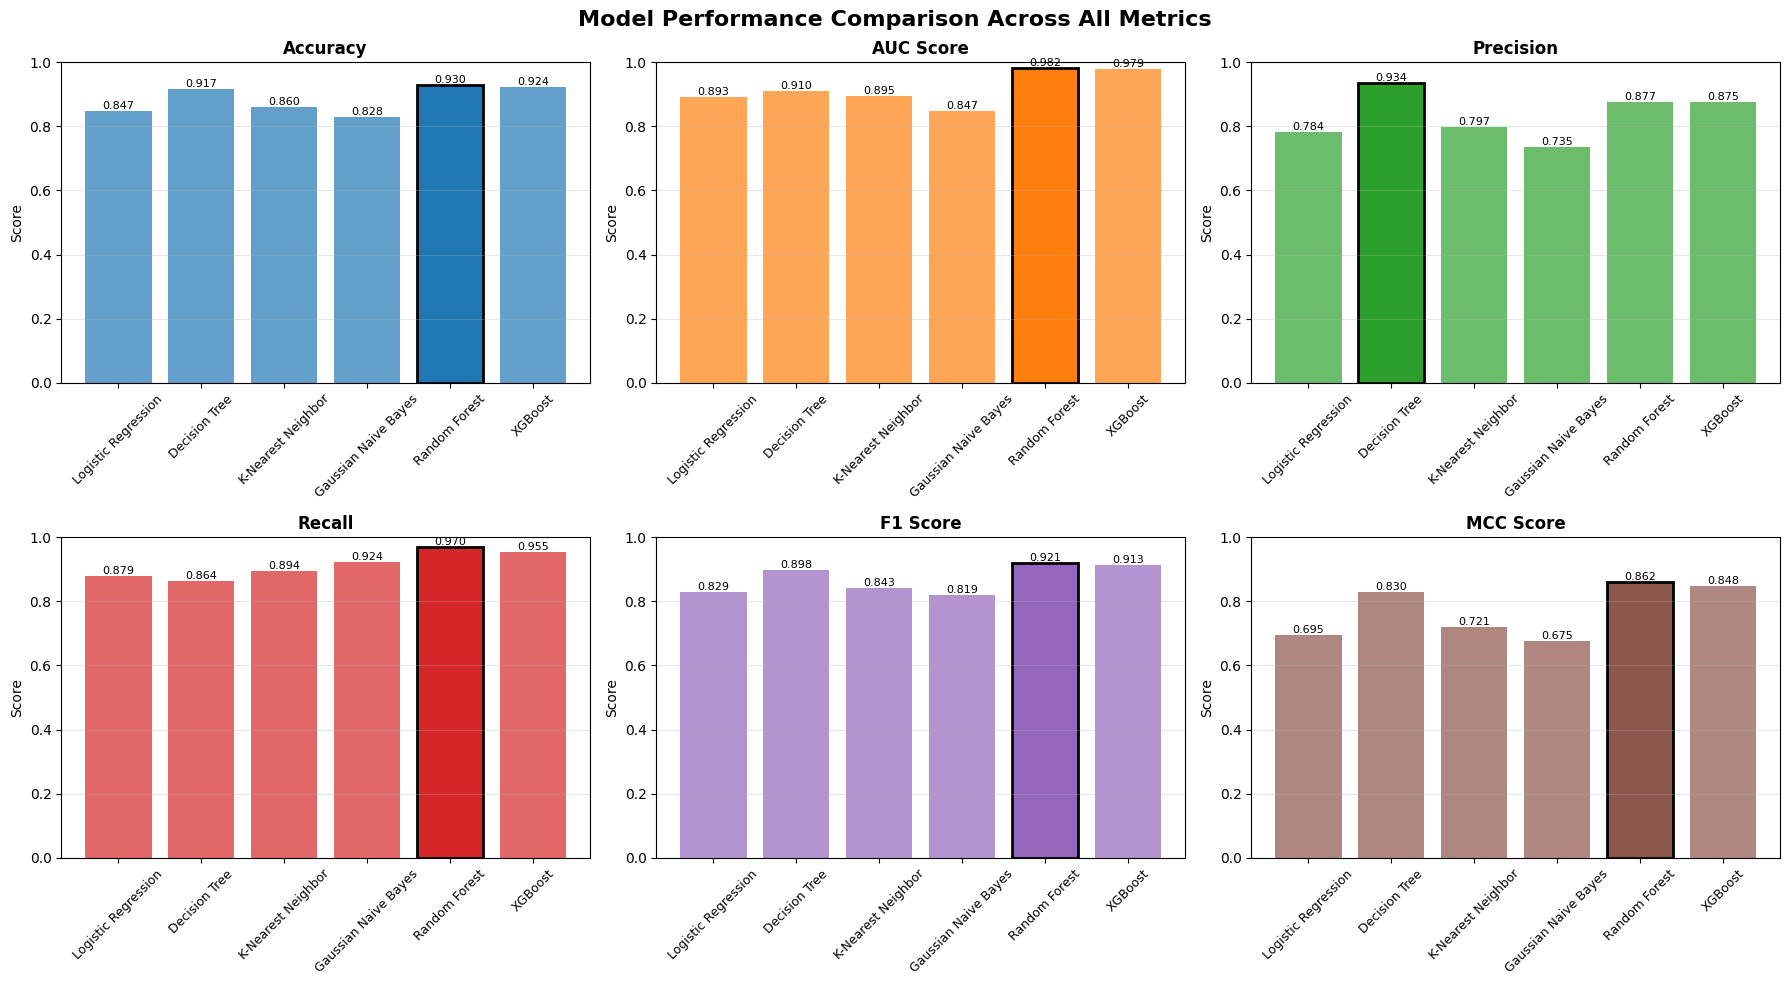

In [19]:
# Visualize model comparison across all metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison Across All Metrics', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score', 'MCC Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for idx, (ax, metric) in enumerate(zip(axes.flatten(), metrics)):
    # Create bars
    bars = ax.bar(results_df['Model'], results_df[metric], color=colors[idx], alpha=0.7)
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=10)
    ax.set_ylim([0, 1])
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    # Highlight best model
    best_idx = results_df[metric].idxmax()
    bars[best_idx].set_color(colors[idx])
    bars[best_idx].set_alpha(1.0)
    bars[best_idx].set_edgecolor('black')
    bars[best_idx].set_linewidth(2)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()